
# Visualizing Underfitting, Overfitting, and the Bias–Variance Trade-Off using Polynomial Regression

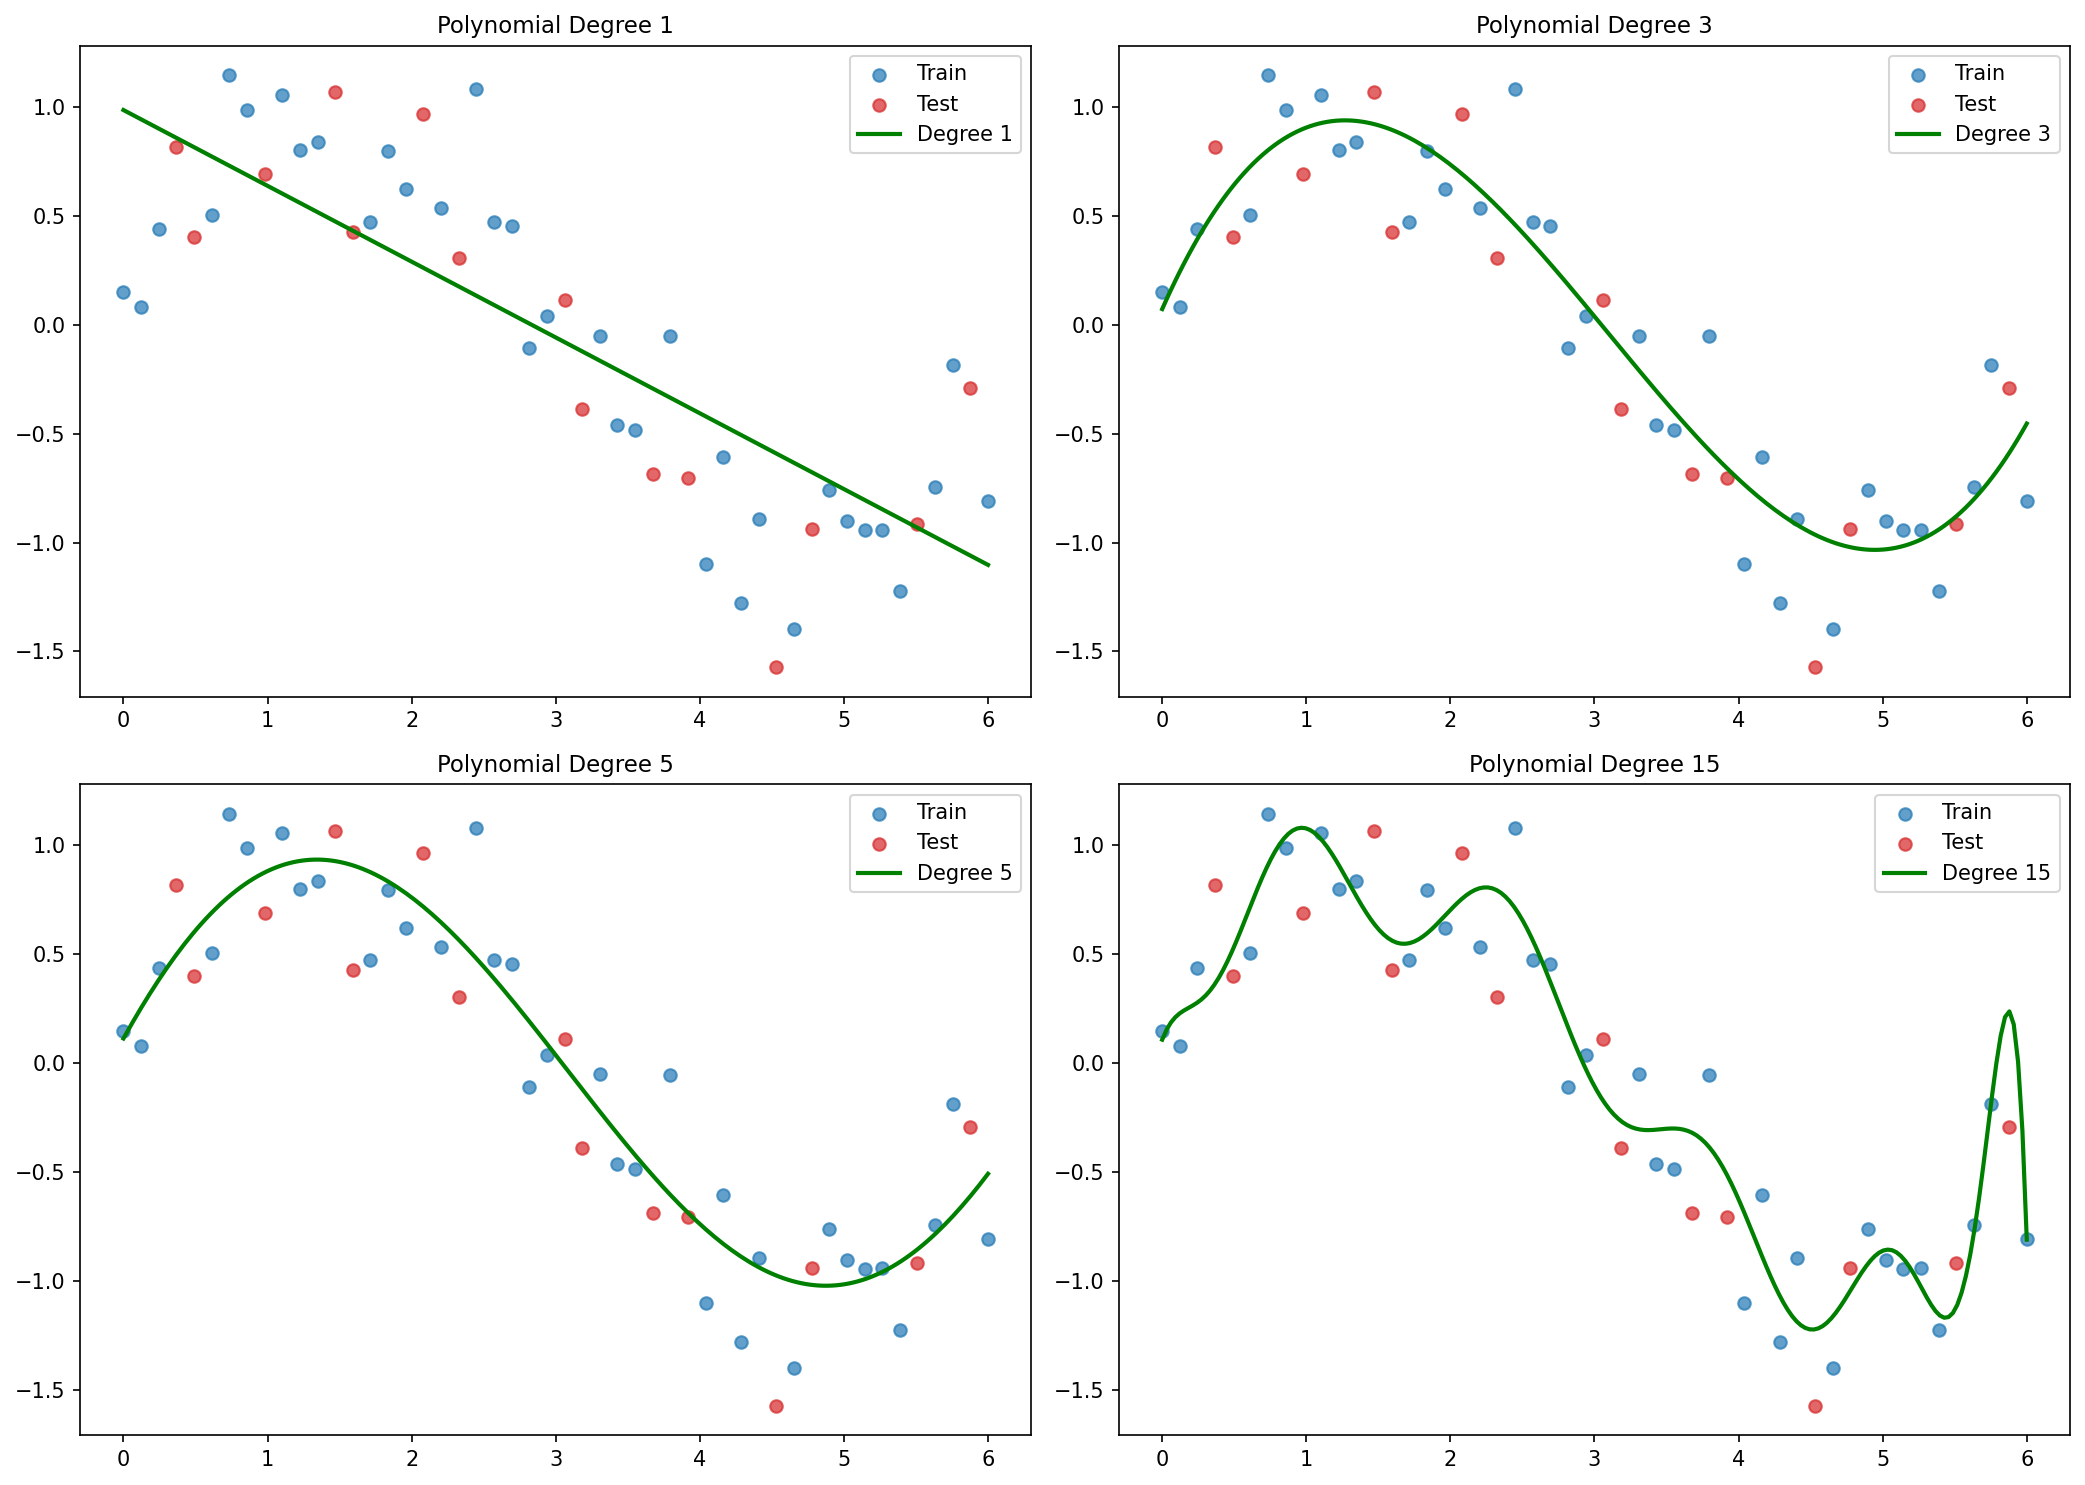

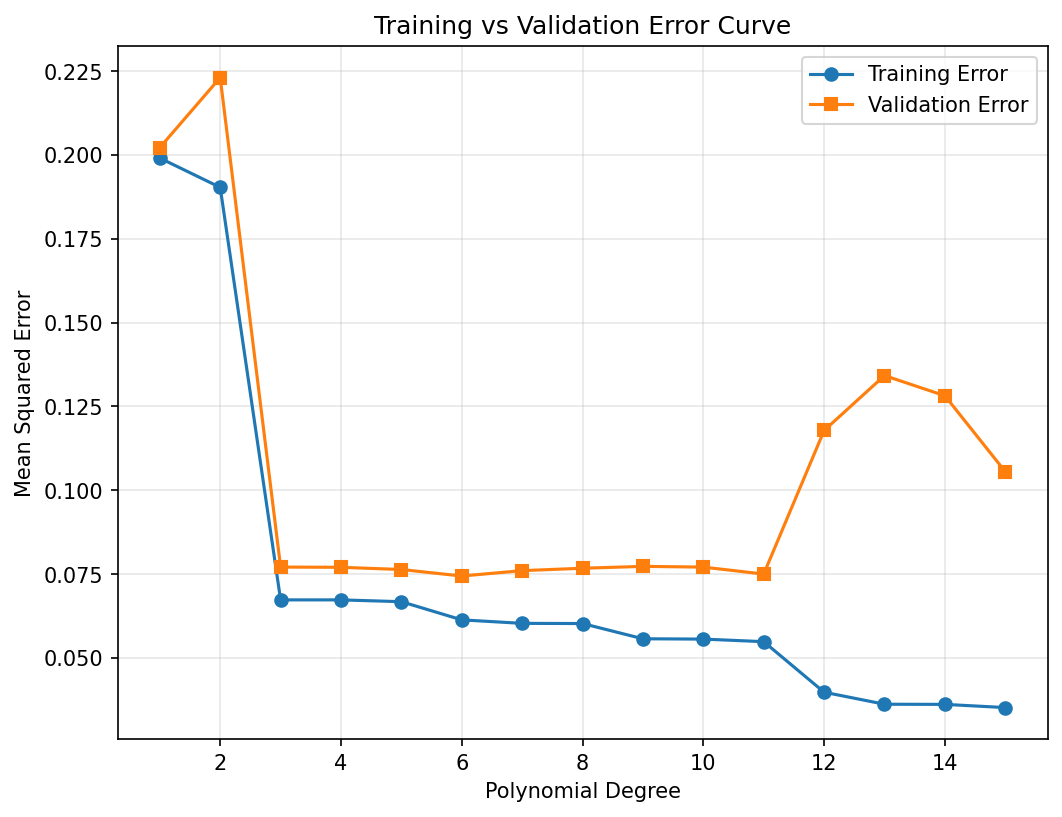

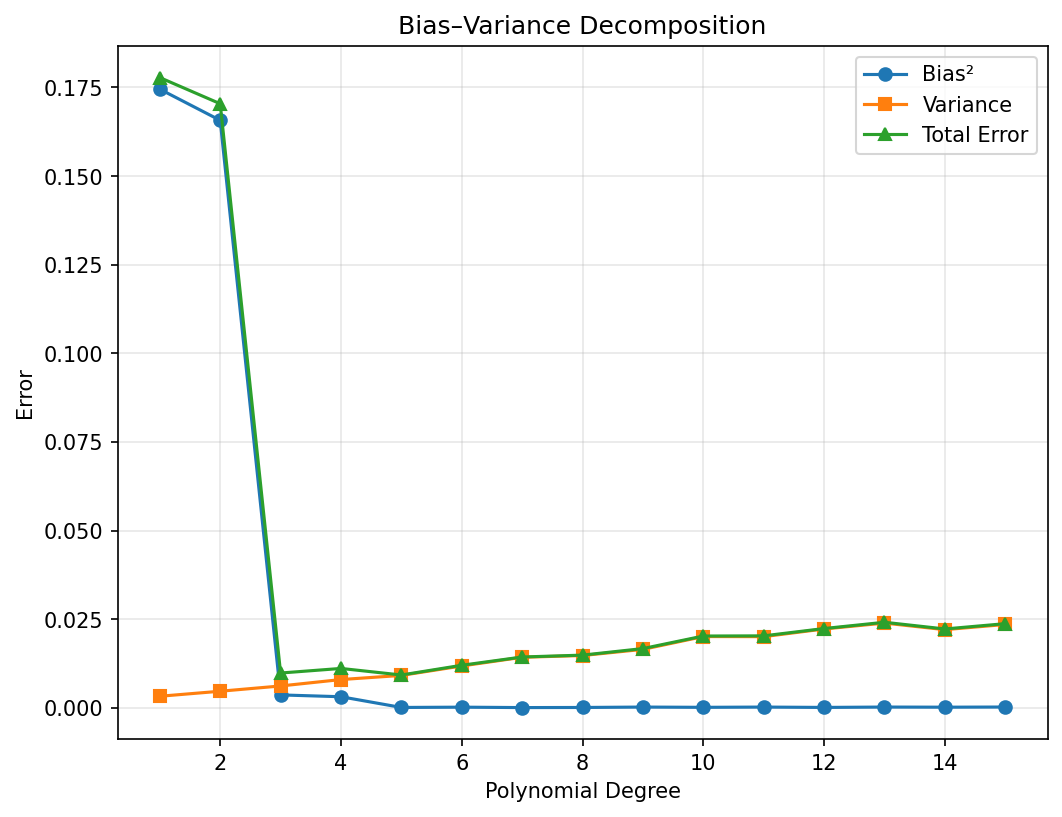

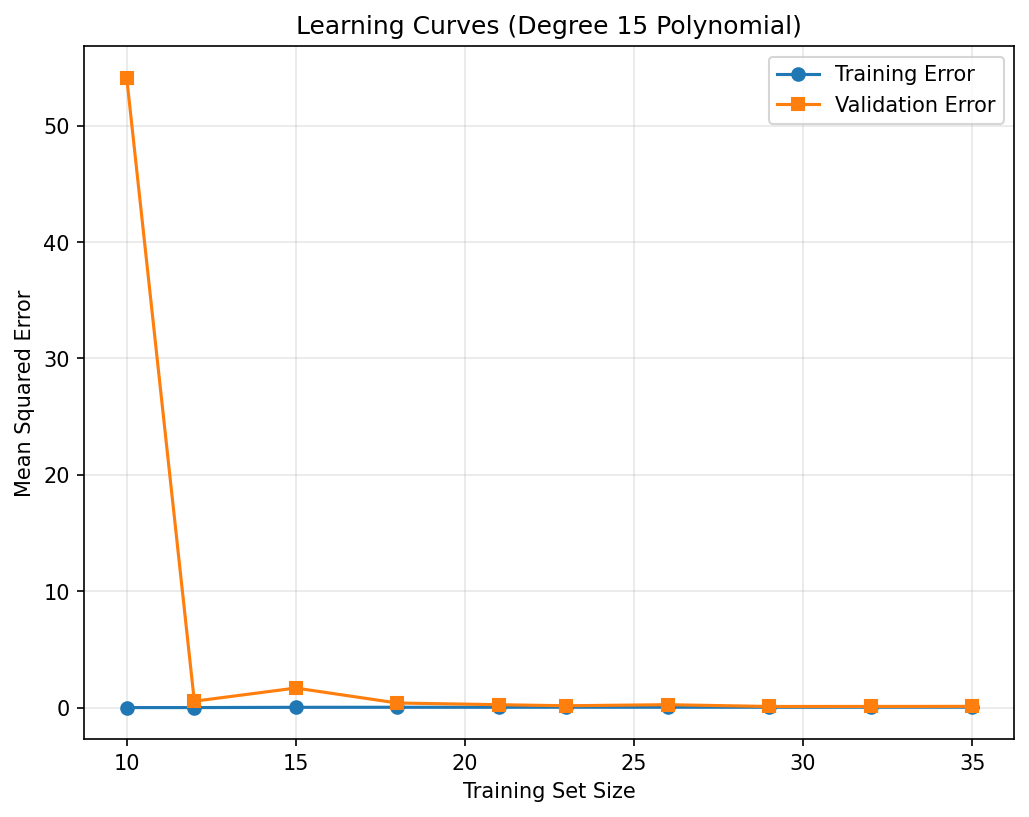

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ---------------------------------------------
# 1. Generate Nonlinear Synthetic Dataset
# ---------------------------------------------
np.random.seed(42)

# A smooth nonlinear target function (sin wave)
X = np.linspace(0, 6, 50)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)  # add realistic noise

X = X.reshape(-1, 1)

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------------------------------------------
# 2. Model Complexity vs Generalization
# ---------------------------------------------
degrees = [1, 3, 5, 15]   # underfit → optimal → overfit → extreme overfit
plt.figure(figsize=(14, 10), dpi=150)

for i, d in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Plot a smooth curve for visualization
    X_plot = np.linspace(0, 6, 200).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))

    plt.subplot(2, 2, i)
    plt.scatter(X_train, y_train, color='#1f77b4', label="Train", alpha=0.7)
    plt.scatter(X_test, y_test, color='#d62728', label="Test", alpha=0.7)
    plt.plot(X_plot, y_plot, color='green', linewidth=2, label=f"Degree {d}")

    plt.title(f"Polynomial Degree {d}", fontsize=11)
    plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------------------------
# 3. Training vs Validation Error Curve
# ---------------------------------------------
all_degrees = range(1, 16)
train_errors, test_errors = [], []

for d in all_degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Compute error
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_poly)))

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(all_degrees, train_errors, marker='o', label="Training Error")
plt.plot(all_degrees, test_errors, marker='s', label="Validation Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Validation Error Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---------------------------------------------
# 4. Bias–Variance Decomposition
# ---------------------------------------------
true_f = np.sin   # the true function (unknown in real world)
X_plot = np.linspace(0, 6, 200).reshape(-1, 1)
y_true = true_f(X_plot).ravel()

bias2_list, var_list, total_error_list = [], [], []
n_bootstrap = 100   # number of models for averaging

for d in all_degrees:
    preds = []

    # Repeated sampling → reveals bias & variance
    for _ in range(n_bootstrap):
        X_sample = np.linspace(0, 6, 50)
        y_sample = np.sin(X_sample) + np.random.normal(scale=0.3, size=X_sample.shape)
        X_sample = X_sample.reshape(-1, 1)

        poly = PolynomialFeatures(degree=d)
        model = LinearRegression()

        model.fit(poly.fit_transform(X_sample), y_sample)
        preds.append(model.predict(poly.transform(X_plot)))

    preds = np.array(preds)

    # Bias² = (average prediction - true function)^2
    avg_pred = preds.mean(axis=0)
    bias2 = np.mean((avg_pred - y_true) ** 2)

    # Variance = mean of prediction variances across x
    var = np.mean(np.var(preds, axis=0))

    # Total error (ignoring irreducible noise)
    total = bias2 + var

    bias2_list.append(bias2)
    var_list.append(var)
    total_error_list.append(total)

# Plot Bias², Variance, and Total Error
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(all_degrees, bias2_list, marker='o', label="Bias²")
plt.plot(all_degrees, var_list, marker='s', label="Variance")
plt.plot(all_degrees, total_error_list, marker='^', label="Total Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Error")
plt.title("Bias–Variance Decomposition")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---------------------------------------------
# 5. Learning Curves (Degree = 15)
# ---------------------------------------------
train_sizes = np.linspace(10, len(X_train), 10, dtype=int)
train_errors, val_errors = [], []

for size in train_sizes:
    X_sub, y_sub = X_train[:size], y_train[:size]

    poly = PolynomialFeatures(degree=15)
    X_sub_poly = poly.fit_transform(X_sub)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_sub_poly, y_sub)

    train_errors.append(mean_squared_error(y_sub, model.predict(X_sub_poly)))
    val_errors.append(mean_squared_error(y_test, model.predict(X_test_poly)))

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(train_sizes, train_errors, marker='o', label="Training Error")
plt.plot(train_sizes, val_errors, marker='s', label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Degree 15 Polynomial)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

